In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [6]:
!pip install graphviz

In [7]:
import graphviz

# lodaing data

In [8]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Exploratry data anylisis(EDA)

In [10]:
df.index

RangeIndex(start=0, stop=1599, step=1)

In [11]:
df.shape

(1599, 12)

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
df['quality'].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

# indexing and slicing of data frame

In [16]:
start=int(input('enter your start number'))
stop=int(input('enter your stop number'))
df[start:stop]

enter your start number1
enter your stop number50


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


# univariate analysis histogram

***** fixed acidity


C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


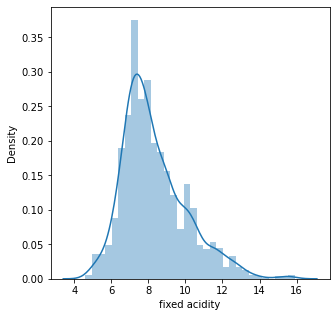

***** volatile acidity


C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


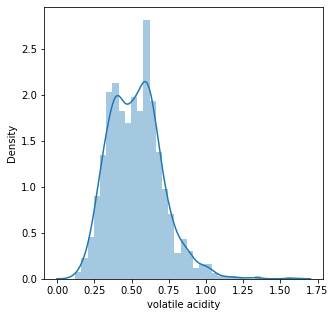

***** citric acid


C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


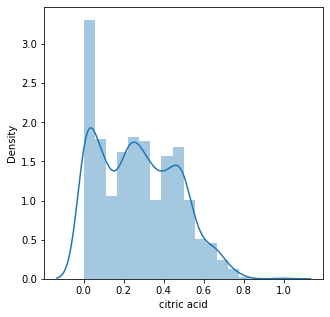

***** residual sugar


C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


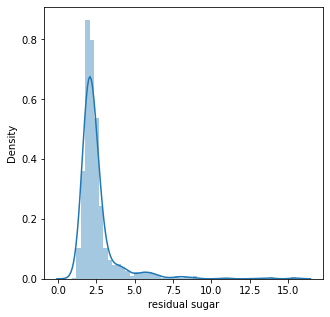

***** chlorides


C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


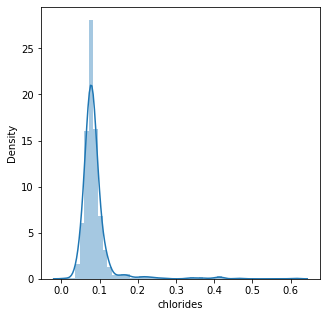

***** free sulfur dioxide


C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


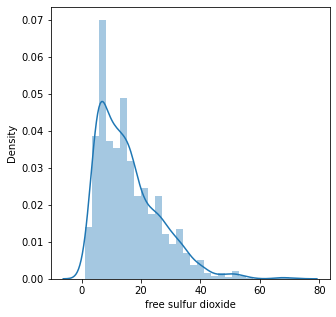

***** total sulfur dioxide


C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


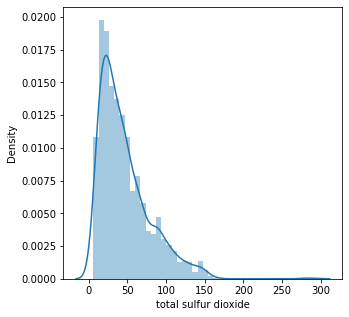

***** density


C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


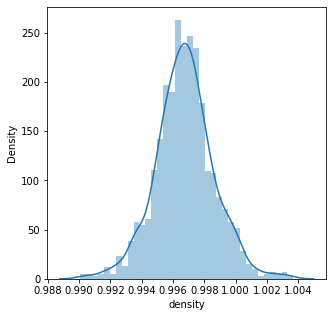

***** pH


C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


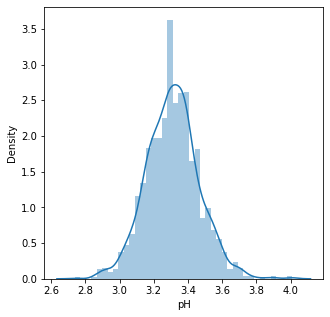

***** sulphates


C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


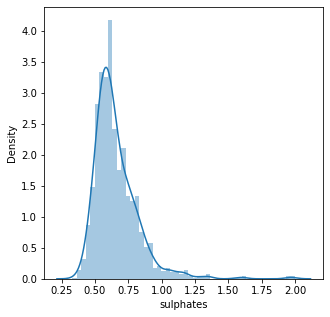

***** alcohol


C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


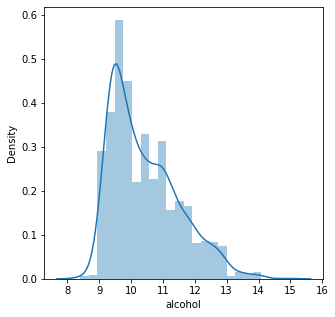

***** quality


C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


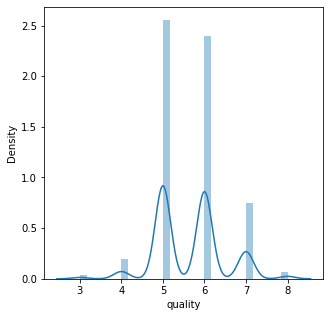

In [17]:
for i in df.columns:
    print('*****',i)
    plt.figure(figsize=(5,5))
    sns.distplot(df[i])
    plt.show()

In [18]:
df[df['quality']==3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [19]:
df[df['quality']==6]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6
24,6.9,0.400,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6
29,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [20]:
print('total data set',len(df))
print('wine qulity 3:',len(df[df['quality']==3]))
print('wine qulity 4:',len(df[df['quality']==4]))
print('wine qulity 5:',len(df[df['quality']==5]))
print('wine qulity 6:',len(df[df['quality']==6]))
print('wine qulity 7:',len(df[df['quality']==7]))
print('wine qulity 8:',len(df[df['quality']==8]))

total data set 1599
wine qulity 3: 10
wine qulity 4: 53
wine qulity 5: 681
wine qulity 6: 638
wine qulity 7: 199
wine qulity 8: 18


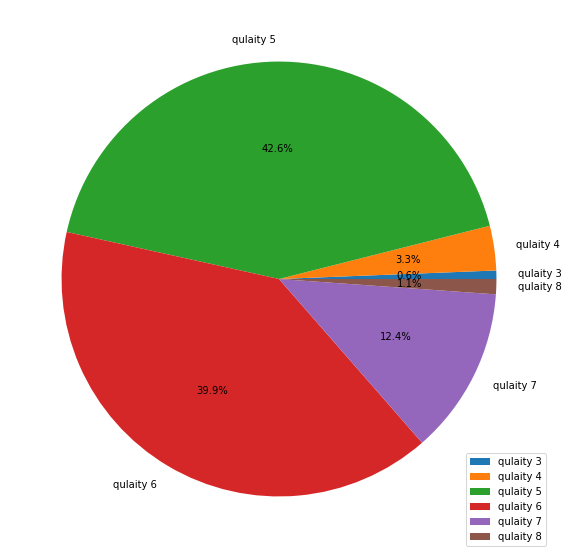

In [21]:
winequality_class=['qulaity 3','qulaity 4','qulaity 5','qulaity 6','qulaity 7','qulaity 8']
colours=['green','red','blue','orange','yellow']
quality_nu=[10,53,681,638,199,18]
plt.figure(figsize=(10,10))
plt.pie(quality_nu,labels=winequality_class,autopct='%1.1f%%')
plt.legend()
plt.show()

C:\Users\sriso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

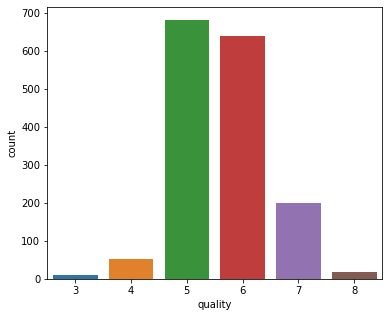

In [22]:
plt.figure(figsize=(6,5))
sns.countplot(df.quality)

# misiing values

In [23]:
df.isnull().sum()## there are no missing values in data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# quntifing the skewness and kurtosis distribution

In [24]:
from scipy.stats import skew, kurtosis
for i in df.columns:
    print('*****',i)
    sk=skew(df[i])
    kurt=kurtosis(df[i])
    print('skew value of', i,' =', sk)
    print('kurtosis value of', i,' =', kurt)
    print('*****')


***** fixed acidity
skew value of fixed acidity  = 0.9818292953262073
kurtosis value of fixed acidity  = 1.1248563352037486
*****
***** volatile acidity
skew value of volatile acidity  = 0.6709623963499574
kurtosis value of volatile acidity  = 1.2179633893005306
*****
***** citric acid
skew value of citric acid  = 0.3180385895475358
kurtosis value of citric acid  = -0.7902825153036646
*****
***** residual sugar
skew value of residual sugar  = 4.536394788805638
kurtosis value of residual sugar  = 28.524437824252235
*****
***** chlorides
skew value of chlorides  = 5.675016527504258
kurtosis value of chlorides  = 41.58170804367577
*****
***** free sulfur dioxide
skew value of free sulfur dioxide  = 1.249393847434253
kurtosis value of free sulfur dioxide  = 2.01348999733378
*****
***** total sulfur dioxide
skew value of total sulfur dioxide  = 1.5141091878506638
kurtosis value of total sulfur dioxide  = 3.7941717664905665
*****
***** density
skew value of density  = 0.07122077153539946
kur

C:\Users\sriso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

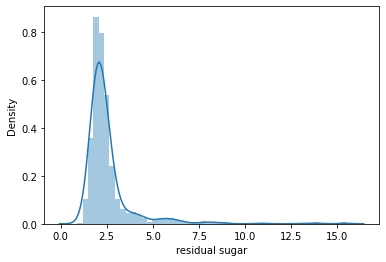

In [25]:
sns.distplot(df['residual sugar'])

* fixed acidity data is normally distributed and there are no kotic tile
* bvolatile acidity is normally distributed and there are no kotic tile
* citric acid is normally distributed and there are no kotic tile
* residual sugar not distributed notmally skewness is in negative side and too much kotic tile
* chlorides not distributed notmally skewness is in negative side and too much kotic tile
 


# Outliers

In [26]:
def outlier_iqr(input_data):
    q1=input_data.quantile(0.25)
    q3=input_data.quantile(0.75)
    iqr = q3-q1
    lower_whisker = q1-(1.5*iqr)
    upper_whisker = q3+(1.5*iqr)
    outlier_list = []
    for i in input_data:
        if i>upper_whisker or i<lower_whisker:
            outlier_list.append(i)
    print ('outliers are', outlier_list)
    print ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)
    return ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)

In [27]:
#Quantifying Outliers
for i in df.columns:
    print('*****',i)
    outlier_iqr(df[i])
    print('*****')

***** fixed acidity
outliers are [12.8, 12.8, 15.0, 15.0, 12.5, 13.3, 13.4, 12.4, 12.5, 13.8, 13.5, 12.6, 12.5, 12.8, 12.8, 14.0, 13.7, 13.7, 12.7, 12.5, 12.8, 12.6, 15.6, 12.5, 13.0, 12.5, 13.3, 12.4, 12.5, 12.9, 14.3, 12.4, 15.5, 15.5, 15.6, 13.0, 12.7, 13.0, 12.7, 12.4, 12.7, 13.2, 13.2, 13.2, 15.9, 13.3, 12.9, 12.6, 12.6]
lower_whisker value : 3.95 upper_whisker value 12.349999999999998
*****
***** volatile acidity
outliers are [1.13, 1.02, 1.07, 1.33, 1.33, 1.04, 1.09, 1.04, 1.24, 1.185, 1.02, 1.035, 1.025, 1.115, 1.02, 1.02, 1.58, 1.18, 1.04]
lower_whisker value : 0.015000000000000013 upper_whisker value 1.0150000000000001
*****
***** citric acid
outliers are [1.0]
lower_whisker value : -0.4049999999999999 upper_whisker value 0.9149999999999999
*****
***** residual sugar
outliers are [6.1, 6.1, 3.8, 3.9, 4.4, 10.7, 5.5, 5.9, 5.9, 3.8, 5.1, 4.65, 4.65, 5.5, 5.5, 5.5, 5.5, 7.3, 7.2, 3.8, 5.6, 4.0, 4.0, 4.0, 4.0, 7.0, 4.0, 4.0, 6.4, 5.6, 5.6, 11.0, 11.0, 4.5, 4.8, 5.8, 5.8, 3.8, 4.4

In [28]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Imputing the Outliers
* There are some outliers in the data columns
* The outliers are only slight amount
* The small amount of outliers will not influance much in Decision Tree, however some columns are manipulated 

In [29]:
df['fixed acidity']=df['fixed acidity'].mask(df['fixed acidity']>12.34,df['fixed acidity'].mean()) 
df['fixed acidity']=df['fixed acidity'].mask(df['fixed acidity']<3.94,df['fixed acidity'].mean()) 
df['residual sugar']=df['residual sugar'].mask(df['residual sugar']>3.65,df['residual sugar'].mean())
df['residual sugar']=df['residual sugar'].mask(df['residual sugar']<0.84,df['residual sugar'].mean())
df['chlorides']=df['chlorides'].mask(df['chlorides']>0.11,df['chlorides'].mean())
df['total sulfur dioxide']=df['total sulfur dioxide'].mask(df['total sulfur dioxide']>122,df['total sulfur dioxide'].median())
df['sulphates']=df['sulphates'].mask(df['sulphates']>0.99,df['sulphates'].median())

# Correlation : Feature selection: 
* In Decision Tree algorithm we dont need to select the important fetures
* Since algorithm will choose the columns based on ginin impurity or entropy

In [30]:
corr = df.corr()

In [31]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255681,0.621586,0.224921,0.256242,-0.140254,-0.115695,0.578800,-0.636690,0.181787,-0.089244,0.112470
volatile acidity,-0.255681,1.000000,-0.552496,0.020078,0.126318,-0.010504,0.075087,0.022026,0.234937,-0.334057,-0.202288,-0.390558
citric acid,0.621586,-0.552496,1.000000,0.180614,0.099528,-0.060978,-0.008622,0.364947,-0.541904,0.276429,0.109903,0.226373
residual sugar,0.224921,0.020078,0.180614,1.000000,0.261511,0.062348,0.137724,0.416941,-0.086370,0.068593,0.084822,0.034110
chlorides,0.256242,0.126318,0.099528,0.261511,1.000000,-0.001050,0.095687,0.465731,-0.235830,-0.035993,-0.327410,-0.184276
free sulfur dioxide,-0.140254,-0.010504,-0.060978,0.062348,-0.001050,1.000000,0.595061,-0.021946,0.070377,0.047305,-0.069408,-0.050656
total sulfur dioxide,-0.115695,0.075087,-0.008622,0.137724,0.095687,0.595061,1.000000,0.083695,0.000408,-0.035280,-0.201234,-0.168010
density,0.578800,0.022026,0.364947,0.416941,0.465731,-0.021946,0.083695,1.000000,-0.341699,0.140922,-0.496180,-0.174919
pH,-0.636690,0.234937,-0.541904,-0.086370,-0.235830,0.070377,0.000408,-0.341699,1.000000,-0.012235,0.205633,-0.057731
sulphates,0.181787,-0.334057,0.276429,0.068593,-0.035993,0.047305,-0.035280,0.140922,-0.012235,1.000000,0.239453,0.385729


<AxesSubplot:>

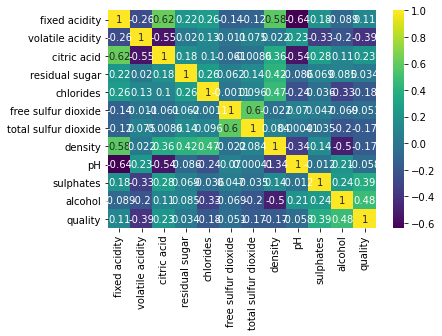

In [32]:
sns.heatmap(corr, annot=True, cmap= 'viridis')

In [33]:
corr_with_quality = df.corr()['quality']
print (corr_with_quality)

fixed acidity           0.112470
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.034110
chlorides              -0.184276
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.168010
density                -0.174919
pH                     -0.057731
sulphates               0.385729
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


# Data scaling (Normalization)

In [34]:
x = df.drop('quality', axis=1)
y=df['quality']

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)


# Data Splitting and Cross Validation

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200) 
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
716,8.0,0.430,0.36,2.3,0.075,10.0,48.0,0.99760,3.34,0.46,9.4
991,7.1,0.340,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4
633,10.1,0.935,0.22,3.4,0.105,11.0,86.0,1.00100,3.43,0.64,11.3
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
1148,7.8,0.390,0.42,2.0,0.086,9.0,21.0,0.99526,3.39,0.66,11.6
...,...,...,...,...,...,...,...,...,...,...,...
1103,7.4,0.490,0.27,2.1,0.071,14.0,25.0,0.99388,3.35,0.63,12.0
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6
810,7.3,0.490,0.10,2.6,0.068,4.0,14.0,0.99562,3.30,0.47,10.5
784,7.1,0.590,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,9.8


In [37]:
#Implementing Decision Tree Classifier

clf=DecisionTreeClassifier(max_depth=4,criterion='gini', splitter='best') # Max depth found 4 is optimal
clf

DecisionTreeClassifier(max_depth=4)

In [38]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [39]:
clf.score(x_test, y_test)*100

60.9375

In [40]:
clf.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(max_depth=4)>

In [41]:
clf.feature_importances_

array([0.        , 0.15594134, 0.        , 0.        , 0.03163314,
       0.        , 0.06768791, 0.04091136, 0.        , 0.20341464,
       0.50041161])

In [42]:
#Visualizing the Decision Tree
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=1bbaf37ddbfa5c2147a709e3538f2bb31e7cea710aa4e6c39f2fd6e627dc5032
  Stored in directory: c:\users\sriso\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [47]:
# Now we will use our trained model which is stored in clf to create a representation of my model that can be further use to
# create visual output on trained tree model
dot_data =tree.export_graphviz(clf, out_file=None,  # export_graphviz is component of tree model
                         feature_names=x.columns,   # providing column names in predictor metrics
                         filled=True, rounded=True,  
                         special_characters=True,proportion=False)
print (dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<alcohol &le; 10.525<br/>gini = 0.648<br/>samples = 1279<br/>value = [9, 43, 535, 510, 165, 17]>, fillcolor="#f9fefb"] ;
1 [label=<sulphates &le; 0.555<br/>gini = 0.552<br/>samples = 782<br/>value = [6, 28, 449, 266, 31, 2]>, fillcolor="#b9f6d2"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<chlorides &le; 0.069<br/>gini = 0.435<br/>samples = 248<br/>value = [3, 15, 179, 50, 1, 0]>, fillcolor="#7eeead"] ;
1 -> 2 ;
3 [label=<sulphates &le; 0.475<br/>gini = 0.661<br/>samples = 34<br/>value = [1, 5, 14, 13, 1, 0]>, fillcolor="#f6fef9"] ;
2 -> 3 ;
4 [label=<gini = 0.459<br/>samples = 14<br/>value = [0, 2, 10, 1, 1, 0]>, fillcolor="#7beeab"] ;
3 -> 4 ;
5 [label=<gini = 0.575<br/>samples = 20<br/>value = [1, 3, 4, 12, 0, 0]>, fillcolor="#9ccef2"] ;
3 -> 5 ;
6 [label=<alcohol &le; 10.25<br/>gini = 0.373<br/>samples = 214<br/>value = [2,

In [44]:
# Visualize the decision tree that we have created.
import pydotplus # This package need to be installed sperately, install through pip or conda installer
#from sklearn.tree import export_graphviz
import sklearn.tree as tree
import graphviz

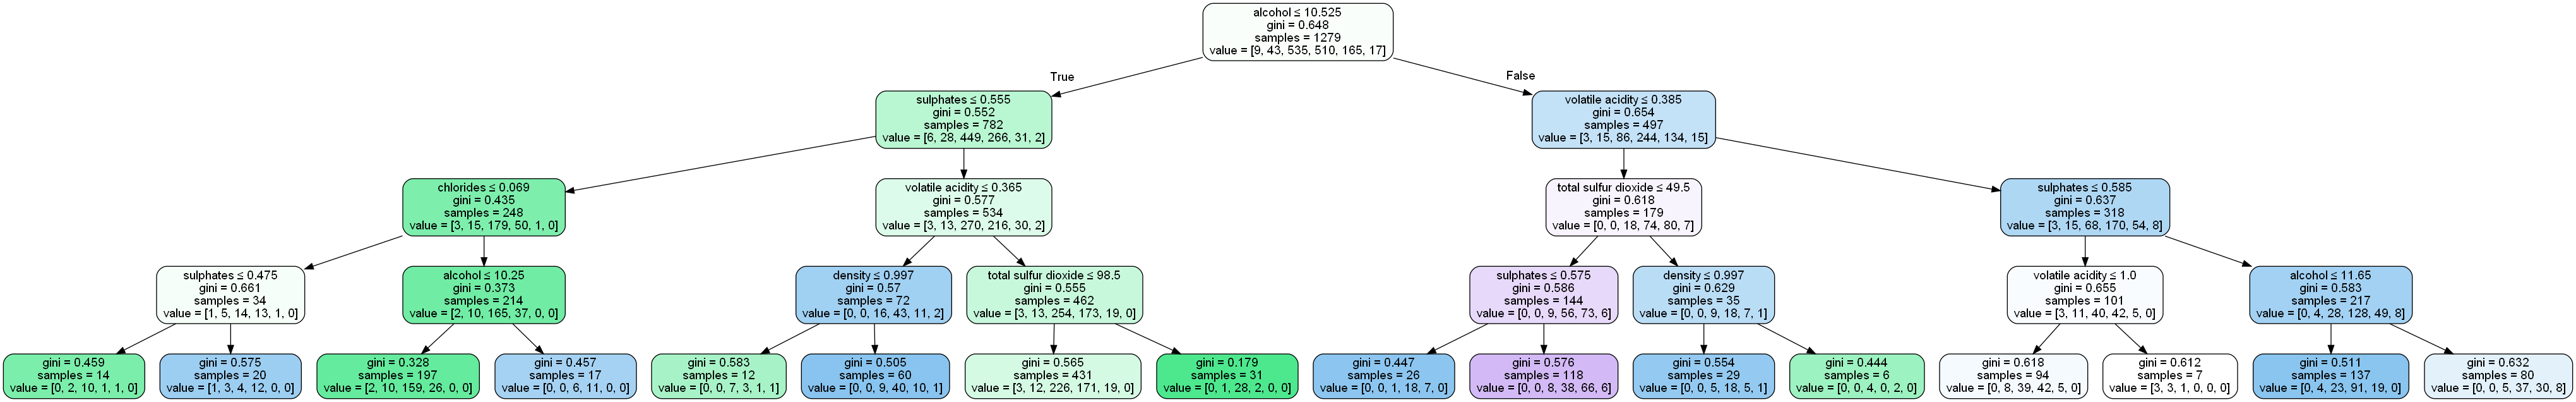

In [48]:
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image 
Image(graph.create_png())         

# Prediction Probabilities

In [175]:
result=clf.predict_proba(x_test)
print(result)
print()
result1=pd.DataFrame(result)
print(result1)

[[0.00696056 0.02784223 0.52436195 0.39675174 0.04408353 0.        ]
 [0.         0.02919708 0.16788321 0.66423358 0.13868613 0.        ]
 [0.00696056 0.02784223 0.52436195 0.39675174 0.04408353 0.        ]
 ...
 [0.         0.02919708 0.16788321 0.66423358 0.13868613 0.        ]
 [0.00696056 0.02784223 0.52436195 0.39675174 0.04408353 0.        ]
 [0.         0.08510638 0.41489362 0.44680851 0.05319149 0.        ]]

            0         1         2         3         4    5
0    0.006961  0.027842  0.524362  0.396752  0.044084  0.0
1    0.000000  0.029197  0.167883  0.664234  0.138686  0.0
2    0.006961  0.027842  0.524362  0.396752  0.044084  0.0
3    0.010152  0.050761  0.807107  0.131980  0.000000  0.0
4    0.000000  0.029197  0.167883  0.664234  0.138686  0.0
..        ...       ...       ...       ...       ...  ...
315  0.006961  0.027842  0.524362  0.396752  0.044084  0.0
316  0.006961  0.027842  0.524362  0.396752  0.044084  0.0
317  0.000000  0.029197  0.167883  0.664234  0.1

In [170]:
pred=clf.predict(x_test)
pred

array([5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 7, 5, 6, 6, 5,
       7, 6, 5, 7, 6, 6, 6, 6, 5, 5, 5, 6, 6, 7, 5, 5, 7, 6, 5, 7, 5, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       7, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       5, 6, 5, 6, 5, 7, 6, 6, 6, 6, 5, 5, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 5, 6, 5, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5,
       5, 5, 6, 5, 5, 7, 5, 7, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 7,
       5, 5, 7, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 3, 6, 6, 5, 6, 5, 5, 5,
       7, 5, 5, 6, 6, 5, 7, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 7, 6, 5, 6, 5, 5, 6, 6, 7, 7, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6,
       5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 7, 5, 5, 6, 5, 5, 6, 6, 5, 7, 6, 6,
       6, 5, 5, 6, 5, 6, 7, 6, 5, 6, 6, 6, 5, 6, 6,

In [174]:
df1=pd.DataFrame({'actual':y_test , 'predicted':pred })
df1.tail(10)

,actual,predicted
523,5,5
575,6,6
235,6,5
1205,7,7
228,6,5
848,5,5
749,6,5
1000,7,6
767,5,5
1122,6,6


In [176]:
confusion_matrix(y_test, pred)


array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   6,   4,   0,   0],
       [  1,   0, 114,  28,   3,   0],
       [  0,   0,  52,  68,   8,   0],
       [  0,   0,   4,  17,  13,   0],
       [  0,   0,   0,   0,   1,   0]], dtype=int64)

In [182]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.609375

In [179]:
from sklearn.metrics import precision_score
precision_score(y_test, pred, average='macro')

C:\Users\VARMA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.29087739630112514

In [187]:
from sklearn.metrics import recall_score
recall_score(y_test, pred, average='macro')

0.28240414316411494

# as per your instruction i did this project sir please sir grade marks properly please dont give simply privious project i am not got marks properly please my efforts will get waste. 

# 